In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
from data_loader import load_images_and_labels
import numpy as np

# Preprocessing and Feature Engineering Data

In [25]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

images, labels, class_names = load_images_and_labels(directory, img_height, img_width)

In [26]:
images = images / 255.0 # normalize image color values from 0-255 to 0-1

n_samples = images.shape[0]
print("Number of samples and image shape:", n_samples, images.shape)
data = images.reshape((n_samples, -1))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Number of samples and image shape: 8677 (8677, 128, 128, 3)
Class Names: ['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner

In [27]:
from sklearn.decomposition import PCA

# Assuming X is your data
pca = PCA().fit(x_train)
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the number of components that explain at least 95% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print("Number of components to explain 95% of variance:", n_components)

Number of components to explain 95% of variance: 1453


In [28]:
pca = PCA(n_components=n_components)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("x_train_pca shape:", x_train_pca.shape)
print("x_test_pca shape:", x_test_pca.shape)

x_train_pca shape: (6941, 1453)
x_test_pca shape: (1736, 1453)


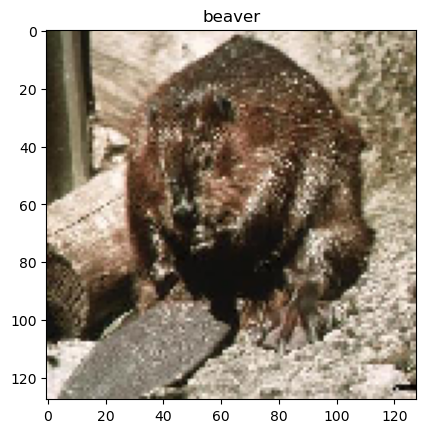

In [16]:
# show a random image
index = random.randint(0, n_samples)
plt.imshow(images[index])
plt.title(class_names[labels[index]])
plt.show()

# SVM Model

In [ ]:
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
y_pred = svm_model.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.4902073732718894


# Training using PCA data

In [29]:
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [30]:
y_pred = svm_model.predict(x_test_pca)

ValueError: X has 1453 features, but SVC is expecting 49152 features as input.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)